In [ ]:
# Import DataLoader
!pip install pandas_datareader
!pip install dataloader

In [ ]:
# Import những module cần
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from pandas_datareader import data
import datetime
import math

In [ ]:
# Import visualize module
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Import module vnquant
import os
!git clone https://github.com/phamdinhkhanh/vnquant
os.chdir('vnquant')
!python setup.py install

In [ ]:
from vnquant.DataLoader import DataLoader

In [ ]:
# Tạo define function để lấy giá và xử lý dữ liệu

def read_stock(x): # Lấy data từ cafef 
    loader = DataLoader(symbols=x,
    start="2010-01-01",
    end="2021-05-12",
    minimal = False,
    data_source="cafef")
    a = loader.download()
    # Rename columns:
    a.columns = ["Change_Price","%Change2","open","high","low","close","volume","volume_reconcile","adjust","value","value_reconcile","volume2"]
    # Drop some unecessary columns
    df = a.drop(["%Change2","volume_reconcile", "value_reconcile","volume2"],axis=1)
    # Sort with ascending:
    df.sort_index(ascending = True)
    return df

In [ ]:
# Lấy giá của FPT, TCB, HPG
FPT = read_stock("FPT")
VCB = read_stock("VCB")
HPG = read_stock("HPG")

In [ ]:
# Show giá
FPT.head(5)

,Change_Price,open,high,low,close,volume,adjust,value
date,,,,,,,,
2010-01-04,3.5,81.0,82.5,79.0,82.5,235620,9.88,19227460000
2010-01-05,0.0,85.5,85.5,82.5,82.5,200040,9.88,16776730000
2010-01-06,-1.5,82.5,83.5,79.5,81.0,94870,9.70,7763345000
2010-01-07,-0.5,81.0,81.5,80.0,80.5,102720,9.64,8295655000
2010-01-08,-2.5,82.0,82.0,78.0,78.0,161560,9.34,12934695000


In [ ]:
# Cho các cột giá close của 3 cp này vào cùng 1 Df
df = DataFrame({"FPT": FPT["adjust"],"VCB" : VCB["adjust"],"HPG" : HPG["adjust"]})
df.head(5)

,FPT,VCB,HPG
date,,,
2010-01-04,9.88,17.24,2.60
2010-01-05,9.88,17.42,2.73
2010-01-06,9.70,16.79,2.81
2010-01-07,9.64,16.44,2.90
2010-01-08,9.34,16.44,2.77


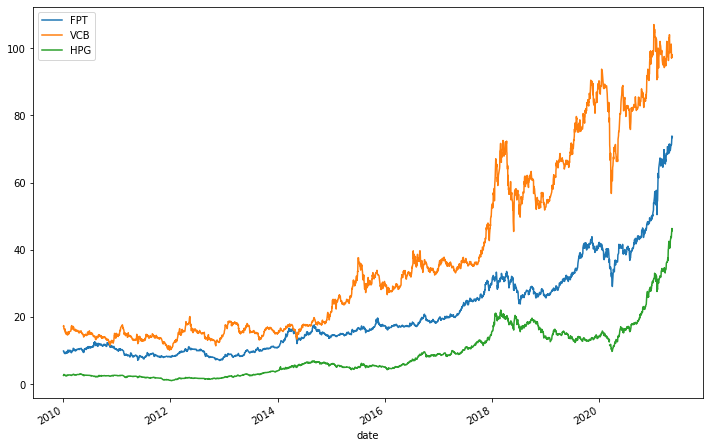

In [ ]:
# Vẽ chart giá của 3 cp này
df.plot(figsize=(12,8))

In [ ]:
# Để thể hiện tốt hơn giá biến động của 3 cp này => Normalized ta quy đổi giá cùng về mức giá (giá đầu tiên thành 1)
df1 = df/df.iloc[0]
df1.head(5)

,FPT,VCB,HPG
date,,,
2010-01-04,1.000000,1.000000,1.000000
2010-01-05,1.000000,1.010441,1.050000
2010-01-06,0.981781,0.973898,1.080769
2010-01-07,0.975709,0.953596,1.115385
2010-01-08,0.945344,0.953596,1.065385


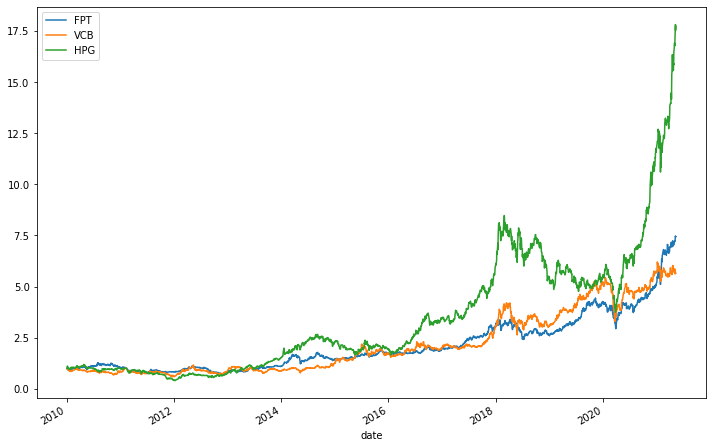

In [ ]:
# Thể hiện lại
df1.plot(figsize=(12,8))

In [ ]:
# Chọn các cp vào danh mục bằng 3 yếu tố: high return, low risk, positive correlation

In [ ]:
# So sánh daily simple return và daily log return
# Simple return
FPT["simple return"] = (FPT["adjust"]/FPT["adjust"].shift(1))-1
VCB["simple return"] = (VCB["adjust"]/VCB["adjust"].shift(1))-1
HPG["simple return"] = (HPG["adjust"]/HPG["adjust"].shift(1))-1
# Vì biên độ biến động daily return <= 7% (loại các giá trị ngoài biên)
FPT_simplere = FPT.loc[(FPT["simple return"] >= -0.07) & (FPT["simple return"] <= 0.07)]
VCB_simplere = VCB.loc[(VCB["simple return"] >= -0.07) & (VCB["simple return"] <= 0.07)]
HPG_simplere = HPG.loc[(HPG["simple return"] >= -0.07) & (HPG["simple return"] <= 0.07)]

In [ ]:
# Tính daily return trung binh 
print("Biên độ daily return của FPT là " + str(round(FPT_simplere["simple return"].mean()*100,3)) + "%")
print("Biên độ daily return của VCB là " + str(round(VCB_simplere["simple return"].mean()*100,3)) + "%")
print("Biên độ daily return của HPG là " + str(round(HPG_simplere["simple return"].mean()*100,3)) + "%")

Biên độ daily return của FPT là 0.084%
Biên độ daily return của VCB là 0.081%
Biên độ daily return của HPG là 0.128%


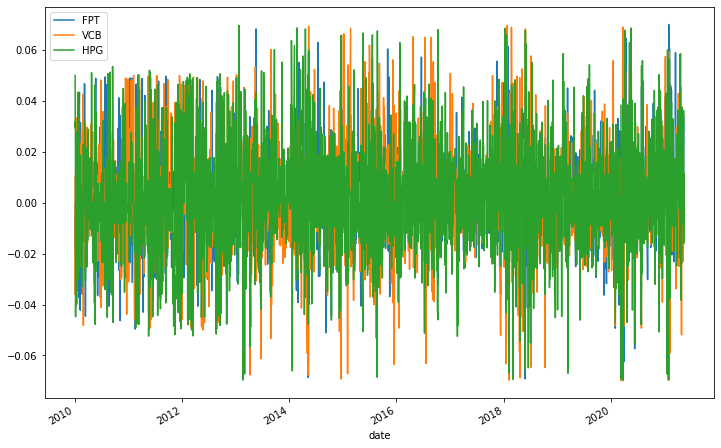

In [ ]:
# Vẽ biểu đồ biến động simple return
s = DataFrame({"FPT":FPT_simplere["simple return"],"VCB":VCB_simplere["simple return"],"HPG":HPG_simplere["simple return"]})
s.plot(figsize=(12,8))

In [ ]:
# Tính log return:
FPT["log return"] = np.log(FPT["adjust"]/FPT["adjust"].shift(1))
VCB["log return"] = np.log(VCB["adjust"]/VCB["adjust"].shift(1))
HPG["log return"] = np.log(HPG["adjust"]/HPG["adjust"].shift(1))
# Vì biên độ biến động daily return <= 7% (loại các giá trị ngoài biên)
FPT_logre = FPT.loc[(FPT["log return"] >= -0.07) & (FPT["log return"] <= 0.07)]
VCB_logre = VCB.loc[(VCB["log return"] >= -0.07) & (VCB["log return"] <= 0.07)]
HPG_logre = HPG.loc[(HPG["log return"] >= -0.07) & (HPG["log return"] <= 0.07)]

In [ ]:
# Tính daily log return trung binh 
print("Biên độ daily log return của FPT là " + str(round(FPT_logre["log return"].mean()*100,3)) + "%")
print("Biên độ daily log return của VCB là " + str(round(VCB_logre["log return"].mean()*100,3)) + "%")
print("Biên độ daily log return của HPG là " + str(round(HPG_logre["log return"].mean()*100,3)) + "%")

Biên độ daily log return của FPT là 0.086%
Biên độ daily log return của VCB là 0.089%
Biên độ daily log return của HPG là 0.124%


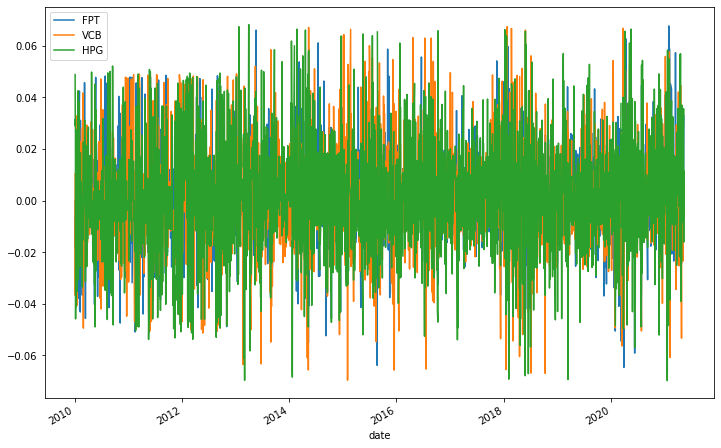

In [ ]:
# Vẽ biểu đồ biến động log return
s = DataFrame({"FPT":FPT_logre["log return"],"VCB":VCB_logre["log return"],"HPG":HPG_logre["log return"]})
s.plot(figsize=(12,8))

In [ ]:
# Tính risk của các cp:
FPT_std = FPT["adjust"].std()
VCB_std = VCB["adjust"].std()
HPG_std = HPG["adjust"].std()
print(FPT_std)
print(VCB_std)
print(HPG_std)

13.249554761700265
26.301853804951158
7.690288298298519


In [ ]:
co = df.corr()
print(co)

          FPT       VCB       HPG
FPT  1.000000  0.961001  0.947982
VCB  0.961001  1.000000  0.904938
HPG  0.947982  0.904938  1.000000


In [ ]:
# Để xây dựng portfolio hiệu quả, chỉ nên sử dụng log return sẽ tốt hơn
# Xây dựng trọng số weights
# Tạo 1 random array weights cho 3 cp:
weight = np.random.random(3)
# Đảm bảo tổng trọng số = 1
weight = weight/np.sum(weight)
weight

array([0.21577697, 0.43280529, 0.35141774])

In [ ]:
# Tạo 1 df log return của 3 cp
log_return = DataFrame({"FPT":FPT_logre["log return"],"VCB":VCB_logre["log return"],"HPG":HPG_logre["log return"]})
log_return.head(5)

,FPT,VCB,HPG
date,,,
2010-01-05,0.000000,0.010387,0.048790
2010-01-06,-0.018387,-0.036836,0.028883
2010-01-07,-0.006205,-0.021066,0.031526
2010-01-08,-0.031615,0.000000,-0.045863
2010-01-11,-0.006445,0.000000,-0.014546


In [ ]:
# Tính annual log return của cả portfolio
port_return = np.sum(weight*log_return.mean())*252
port_return

0.2542130607338273

In [ ]:
# Tính port_variance
port_variance = np.dot(weight.T, np.dot(log_return.cov()*252,weight))
port_variance

0.058743124958223446

In [ ]:
# Tính port_volatility
port_volatility = np.sqrt(port_variance)
port_volatility

0.24236981032757246

In [ ]:
# Tính sharp ratio:
sharp_ratio = port_return/port_volatility
sharp_ratio

1.0488643795621584

In [ ]:
# Tạo 1000 simulation với weight khác
list_return = []
list_volatility = []
all_weight = []

for i in range(1000):
  weight = np.random.random(3)
  weight = weight/np.sum(weight)
  port_return = np.sum(weight*log_return.mean())*252
  port_volatility = np.sqrt(np.dot(weight.T, np.dot(log_return.cov()*252,weight)))
  list_return.append(port_return)
  list_volatility.append(port_volatility)
  all_weight.append(weight)
# Thay vì để dạng list sẽ rất dài và khó nhìn => chuyển sang dạng array
list_return = np.array(list_return)
list_volatility = np.array(list_volatility)

In [ ]:
# Tạo 1 DF bao gồm list_return và list_volatility
port = pd.DataFrame({"return":list_return,"volatility":list_volatility})
port.head(5)

,return,volatility
0,0.222531,0.230976
1,0.255012,0.236394
2,0.285632,0.277798
3,0.230247,0.250227
4,0.268204,0.252271


In [ ]:
# Tính sharpe ratio:
sharpe_ratio = list_return/list_volatility
# Giá trị shapre ratio max
sharpe_ratio.max()
# Tìm trọng số cp đạt được mức sharpe ratio cao nhất, dùng hàm argmax()
sharpe_ratio.argmax()
all_weight[744]

array([0.08773839, 0.51650332, 0.39575829])

Text(0, 0.5, 'return')

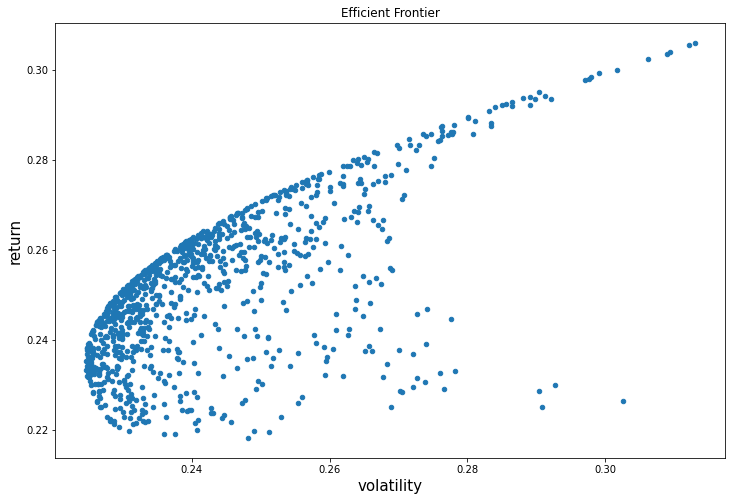

In [ ]:
# Vẽ chart Efficient Frontier
port.plot(x="volatility", y="return", kind = "scatter", figsize = (12,8))
plt.title("Efficient Frontier")
plt.xlabel("volatility",fontsize=15)
plt.ylabel("return",fontsize=15)